## 1 模拟合成时间序列

-- 利用线性模型ARIMA分析理论时间序列建模与预测

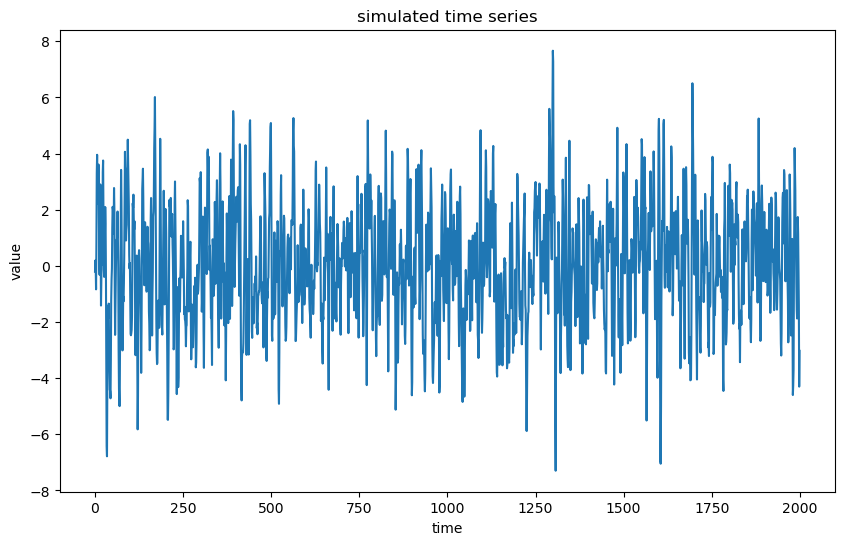

ADF Statistic:-15.541351
p-value:0.000000
Critical Value (1%): -3.434
Critical Value (5%): -2.863
Critical Value (10%): -2.568
序列平稳，d=0


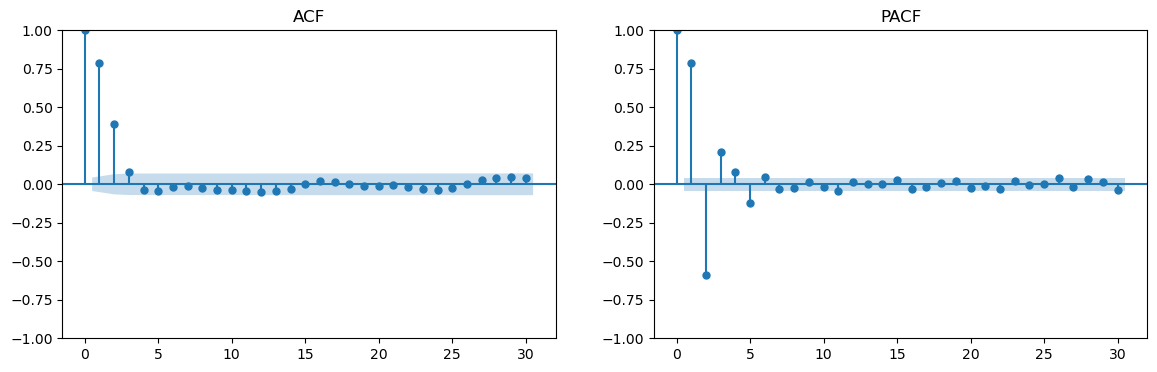

In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# 设置随机种子以确保可重复性
np.random.seed(12345)

# 定义ARMA模型参数
p_ar = np.array([.75, -.25])
q_ma = np.array([.65, .35])
ar = np.r_[1, -p_ar]  # 添加零滞后项并取反
ma = np.r_[1, q_ma]   # 添加零滞后项

# 创建ARMA过程
arma_process = sm.tsa.ArmaProcess(ar, ma)

# 生成样本数据
Ny = 2000
yy_arma = arma_process.generate_sample(Ny)

# 绘制生成的时间序列
fig = plt.figure(figsize=(10, 6))
plt.plot(yy_arma)
plt.title('simulated time series')
plt.xlabel('time')
plt.ylabel('value')
plt.show()

# 检查平稳性 - ADF检验
result = adfuller(yy_arma)
print('ADF Statistic:%f'% result[0])
print('p-value:%f'% result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))
if result[1] < 0.05:
    print("序列平稳，d=0")

# 如果序列不平稳，则进行差分
if result[1] > 0.05:
    yy_arma_diff = np.diff(yy_arma)
    result_diff= adfuller(yy_arma_diff)
    print('After Differencing:')
    print('ADF Statistic:%f'% result_diff[0])
    print('p-value:%f'% result_diff[1])
    for key, value in result_diff[4].items():
        print('Critical Value (%s): %.3f' % (key, value))
else:
    yy_arma_diff = yy_arma

# 绘制 ACF 和 PACF 图
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(yy_arma_diff, lags=30, ax=ax[0])
ax[0].set_title('ACF')
plot_pacf(yy_arma_diff, lags=30, ax=ax[1])
ax[1].set_title('PACF')

plt.show()

通过acf图，可以判断q=2；而在pacf图中，lag=2-5都均显著大于0，所以初步可得p=2-5，要进一步对模型进行分析

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2000
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -2838.226
Date:                Tue, 18 Jun 2024   AIC                           5688.453
Time:                        06:09:49   BIC                           5722.058
Sample:                             0   HQIC                          5700.792
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0262      0.085      0.309      0.757      -0.140       0.193
ar.L1          0.6899      0.052     13.167      0.000       0.587       0.793
ar.L2         -0.2370      0.041     -5.714      0.0

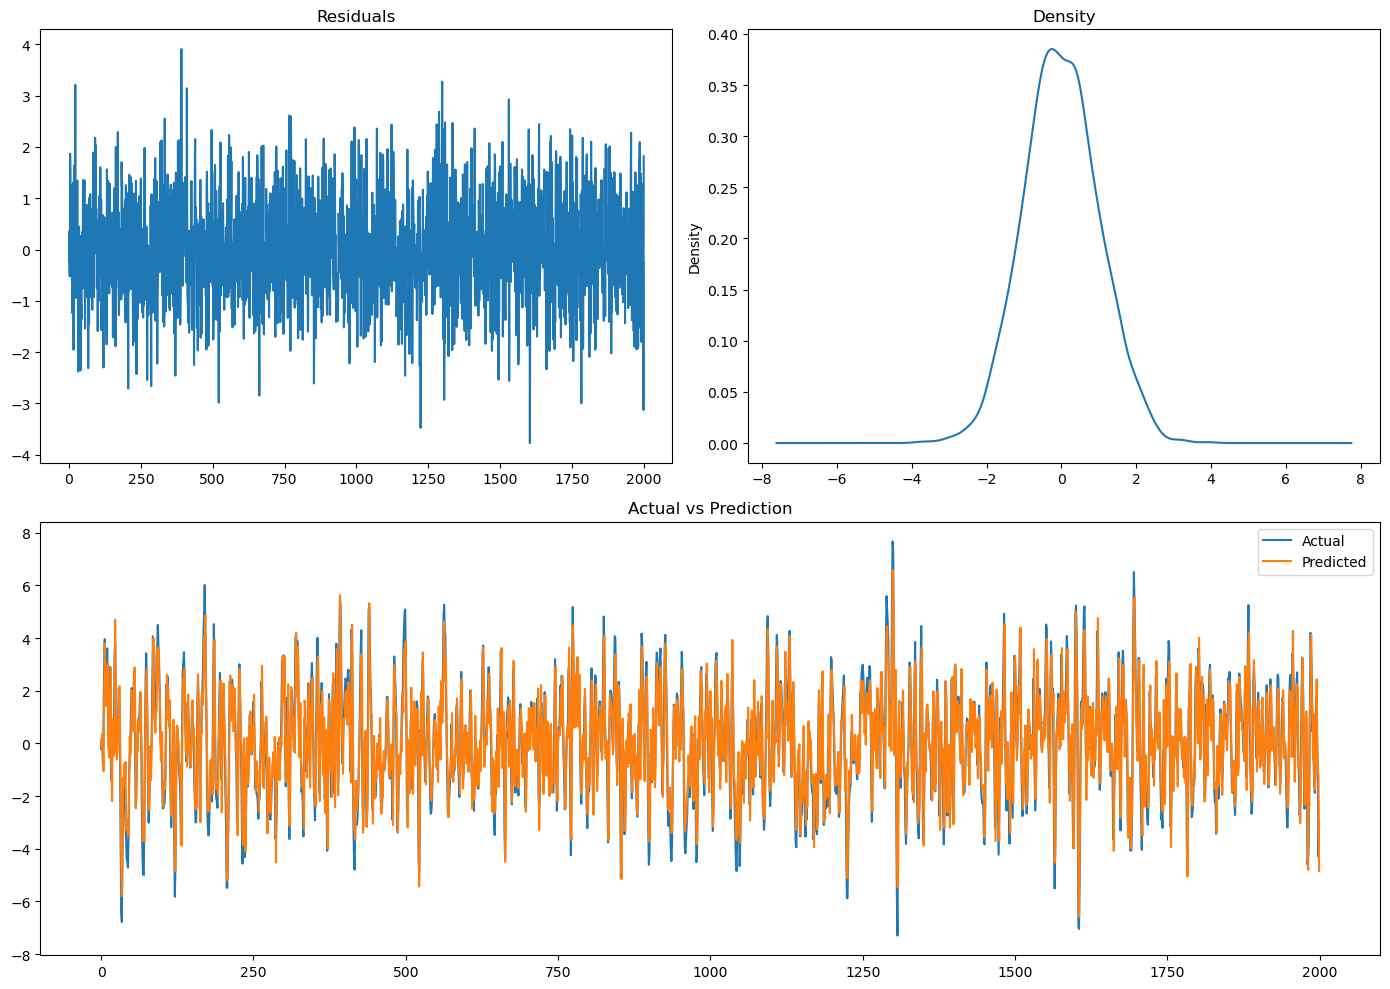

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2000
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -2837.924
Date:                Tue, 18 Jun 2024   AIC                           5689.848
Time:                        06:09:50   BIC                           5729.054
Sample:                             0   HQIC                          5704.244
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0260      0.084      0.311      0.756      -0.138       0.190
ar.L1          0.6348      0.088      7.219      0.000       0.462       0.807
ar.L2         -0.1637      0.105     -1.563      0.1

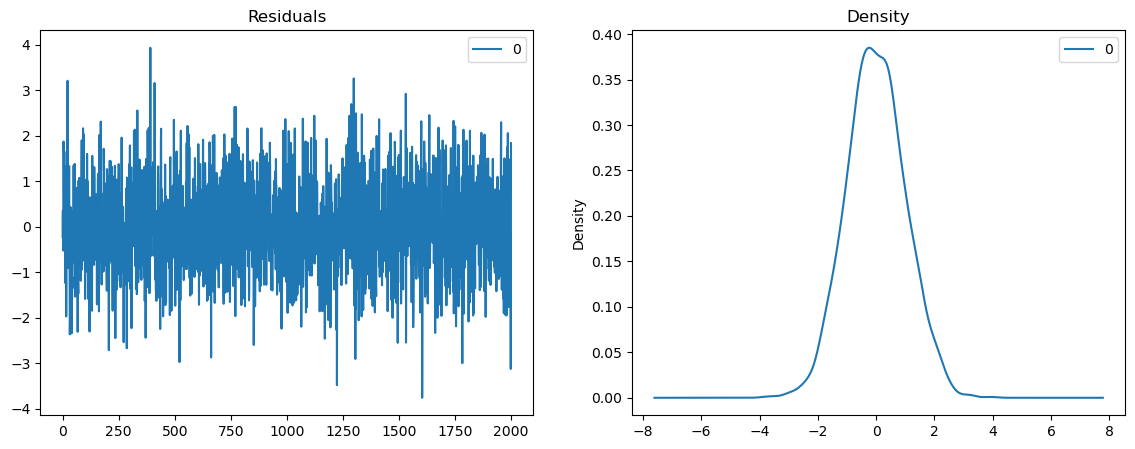

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2000
Model:                 ARIMA(4, 0, 2)   Log Likelihood               -2837.848
Date:                Tue, 18 Jun 2024   AIC                           5691.696
Time:                        06:09:51   BIC                           5736.504
Sample:                             0   HQIC                          5708.149
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0261      0.084      0.309      0.757      -0.140       0.192
ar.L1          0.6435      0.089      7.229      0.000       0.469       0.818
ar.L2         -0.1412      0.123     -1.146      0.2

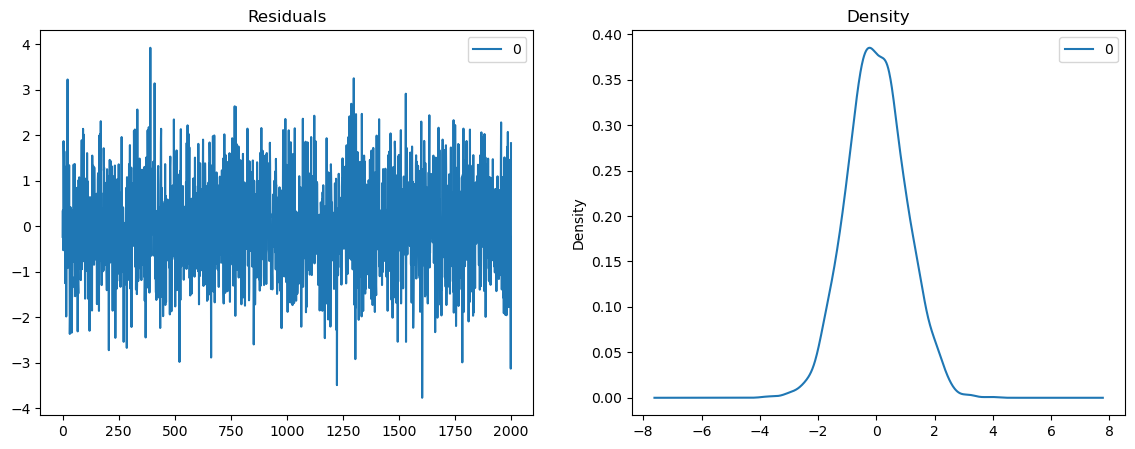

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2000
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -2837.361
Date:                Tue, 18 Jun 2024   AIC                           5692.721
Time:                        06:09:54   BIC                           5743.129
Sample:                             0   HQIC                          5711.230
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0262      0.086      0.306      0.760      -0.142       0.194
ar.L1          0.4536      0.158      2.869      0.004       0.144       0.764
ar.L2         -0.0737      0.143     -0.516      0.6

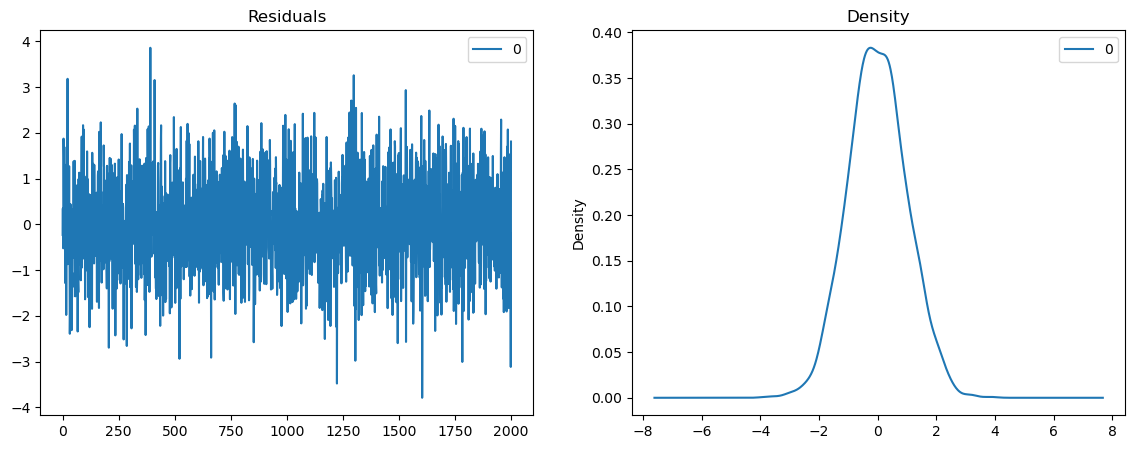

In [6]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.gridspec import GridSpec
#GridSpec 是 Matplotlib 中用于创建复杂布局的一个工具，它允许你在一个图形中创建多个子图（subplot），并指定每个子图的大小和位置。

# p=2,d=0,q=2 ARIMA Model
model = ARIMA(yy_arma, order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary())

fig = plt.figure(figsize=(14, 10))
gs = GridSpec(2, 2, height_ratios=[1, 1]) #指定每一行的高度比例。这里的 [1, 1] 表示两行的高度比是 1:1，即每行的高度相等。
# Residuals plot
residuals = pd.DataFrame(model_fit.resid)
ax0 = fig.add_subplot(gs[0, 0])
residuals.plot(title="Residuals", ax=ax0, legend=False)

# Density plot
ax1 = fig.add_subplot(gs[0, 1])
residuals.plot(kind='kde', title='Density', ax=ax1, legend=False)
#使用 plot 方法中的 kind='kde' 参数来指定绘图类型为核密度估计（Kernel Density Estimate）。

# Actual vs Prediction plot
ax2 = fig.add_subplot(gs[1, :])
ax2.plot(yy_arma, label='Actual')
ax2.plot(model_fit.predict(), label='Predicted')
ax2.set_title('Actual vs Prediction')
ax2.legend()
plt.tight_layout()
plt.savefig("2_0_2.png")
plt.show()

# p=3,d=0,q=2 ARIMA Model
model = ARIMA(yy_arma, order=(3,0,2))
model_fit = model.fit()
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(14,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# p=4,d=0,q=2 ARIMA Model
model = ARIMA(yy_arma, order=(4,0,2))
model_fit = model.fit()
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(14,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# p=5,d=0,q=2 ARIMA Model
model = ARIMA(yy_arma, order=(5,0,2))
model_fit = model.fit()
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(14,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

根据$P>|z|$和AIC和BIC指标，对比选择出最优模型参数为：p=2,d=0,q=2。
<br />接下来根据最优模型，进行预测。

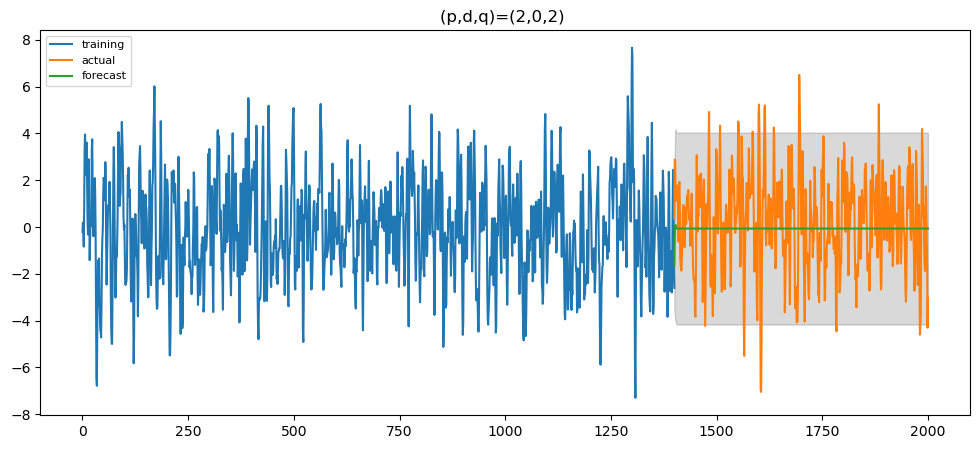

In [24]:
data_size = len(yy_arma)
time_data = np.arange(data_size)
train_size = int(len(yy_arma) * 0.7)
train_data = yy_arma[:train_size]
time_train = np.linspace(0,train_size,num=train_size)
test_data = yy_arma[train_size:]
test_size= len(test_data)
time_test = np.linspace(train_size,data_size,num=test_size)

p, d, q  = 2, 0, 2
model = ARIMA(train_data, order=(p, d, q ))  
model_fit = model.fit()  

# Forecast with confidence level = 95% 
fore_size = test_size 
time_fore = np.linspace(train_size,train_size+test_size,num=fore_size)
forecasts=model_fit.get_forecast(fore_size).summary_frame(alpha=0.05) 

time_fore_mean = forecasts['mean'].values
time_fore_upper = forecasts['mean_ci_upper'].values # 预测上置信区间
time_fore_lower = forecasts['mean_ci_lower'].values

plt.figure(figsize=(12,5), dpi=100)
plt.plot(time_train, train_data, label='training')
plt.plot(time_test, test_data, label='actual')
plt.plot(time_fore, time_fore_mean, label='forecast')
plt.fill_between(time_fore, time_fore_upper, time_fore_lower, color='k', alpha=.15)
plt.title(f'(p,d,q)=({q},{d},{q}) ')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## 2 周期性时间序列建模和预测（任务）

调研Seasonal ARIMA模型的理论，并利用SARIMA(p,d,q)x(P,D,Q)模型对周期性数据数据开展完整地分析、建模和预测。


Seasonal ARIMA模型理论：SARIMA扩展了ARIMA来处理数据中的季节性。它被表示为SARIMA($p,d,q$)($𝑃,𝐷,𝑄,𝑠$)
<br />$P$:季节自回归(seasonal autoregressive (SAR))的项数。
<br />$D$:季节差分(seasonal differences)的数量。
<br />$Q$:季节移动平均(SMA)项的数量。
<br />$s$:单个季节周期的时间步数。

               value
date                
1991-07-01  3.526591
1991-08-01  3.180891
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869


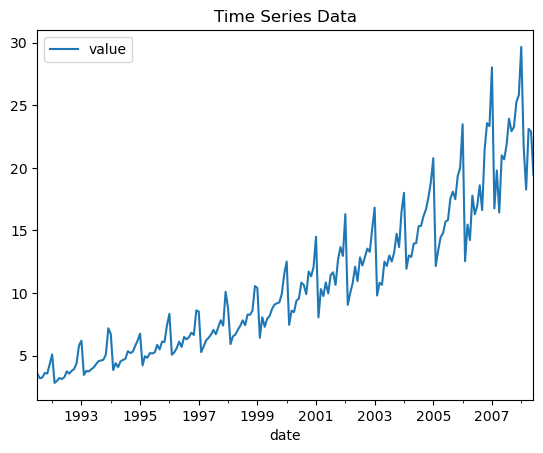

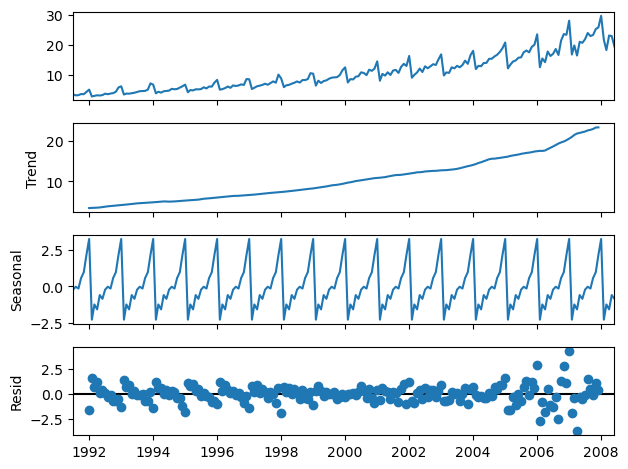

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load the data
file_sarima = 'sarima_test.csv'
data = pd.read_csv(file_sarima, index_col=0, parse_dates=True)

# Display the first few rows
print(data.head())

# Plot the data
data.plot(title='Time Series Data')
plt.show()

# Check for stationarity and make the series stationary if necessary
# Here, assuming a seasonal period of 12 (e.g., monthly data with yearly seasonality)
decomposed = seasonal_decompose(data, model='additive')
decomposed.plot()
plt.show()

由上图可以看出原始数据并非平稳序列，接下来对其进行差分。

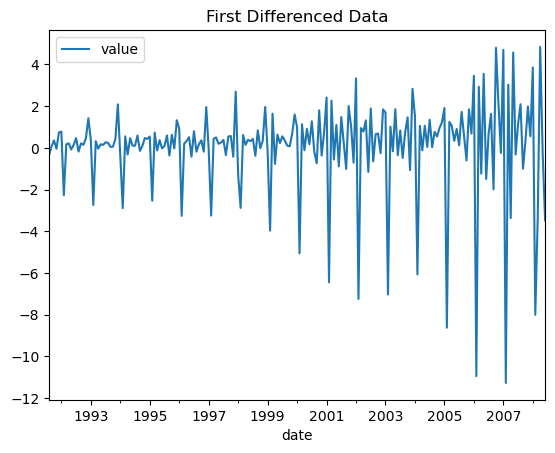

ADF Statistic:-2.495172
p-value:0.116653
Critical Value (1%): -3.466
Critical Value (5%): -2.877
Critical Value (10%): -2.575


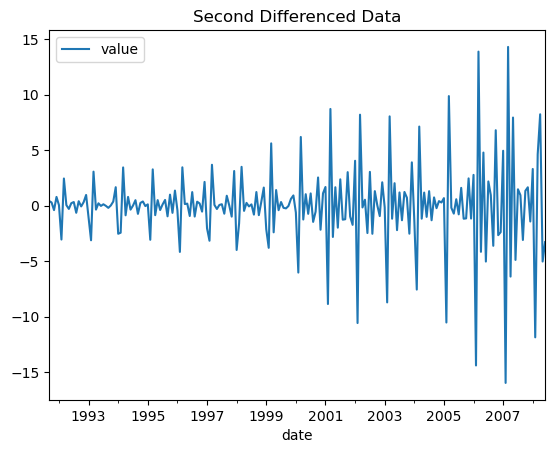

After 2nd Differencing:
ADF Statistic: -10.292305
p-value: 0.000000
Critical Value (1%): -3.466
Critical Value (5%): -2.877
Critical Value (10%): -2.575
二阶差分后序列平稳，d=2


In [10]:
# Differencing to make data stationary
data_diff = data.diff().dropna()
data_diff.plot(title='First Differenced Data')
plt.show()

result = adfuller(data_diff)
print('ADF Statistic:%f'% result[0])
print('p-value:%f'% result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))
    
if result[1] < 0.05:
    print("序列平稳，d=0")
else:
    data_diff_2 = data_diff.diff().dropna()
    data_diff_2.plot(title='Second Differenced Data')
    plt.show()
    
    result2 = adfuller(data_diff_2)
    print('After 2nd Differencing:')
    print('ADF Statistic: %f' % result2[0])
    print('p-value: %f' % result2[1])
    for key, value in result2[4].items():
        print('Critical Value (%s): %.3f' % (key, value))

    if result2[1] < 0.05:
        print("二阶差分后序列平稳，d=2")

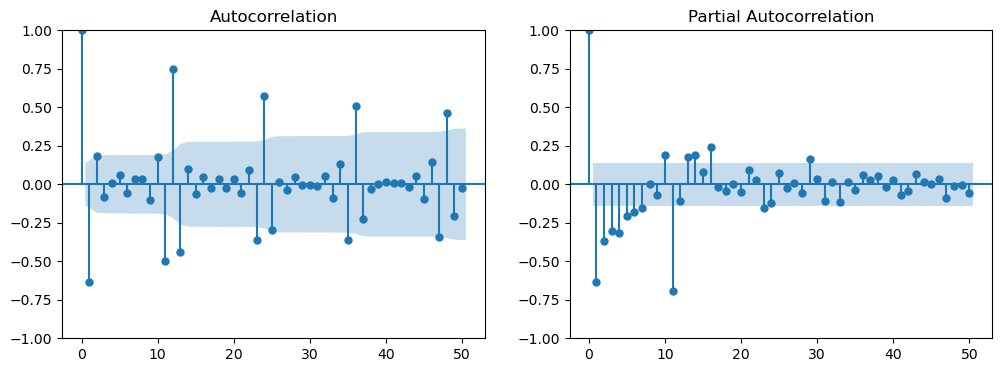

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Best SARIMA(2, 2, 1) AIC: 537.203590497701


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  204
Model:             SARIMAX(2, 2, 1)x(1, 1, 1, 12)   Log Likelihood                -262.602
Date:                            Tue, 18 Jun 2024   AIC                            537.204
Time:                                    06:28:23   BIC                            556.686
Sample:                                07-01-1991   HQIC                           545.096
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8815      0.046    -19.236      0.000      -0.971      -0.792
ar.L2         -0.4063      0.047   

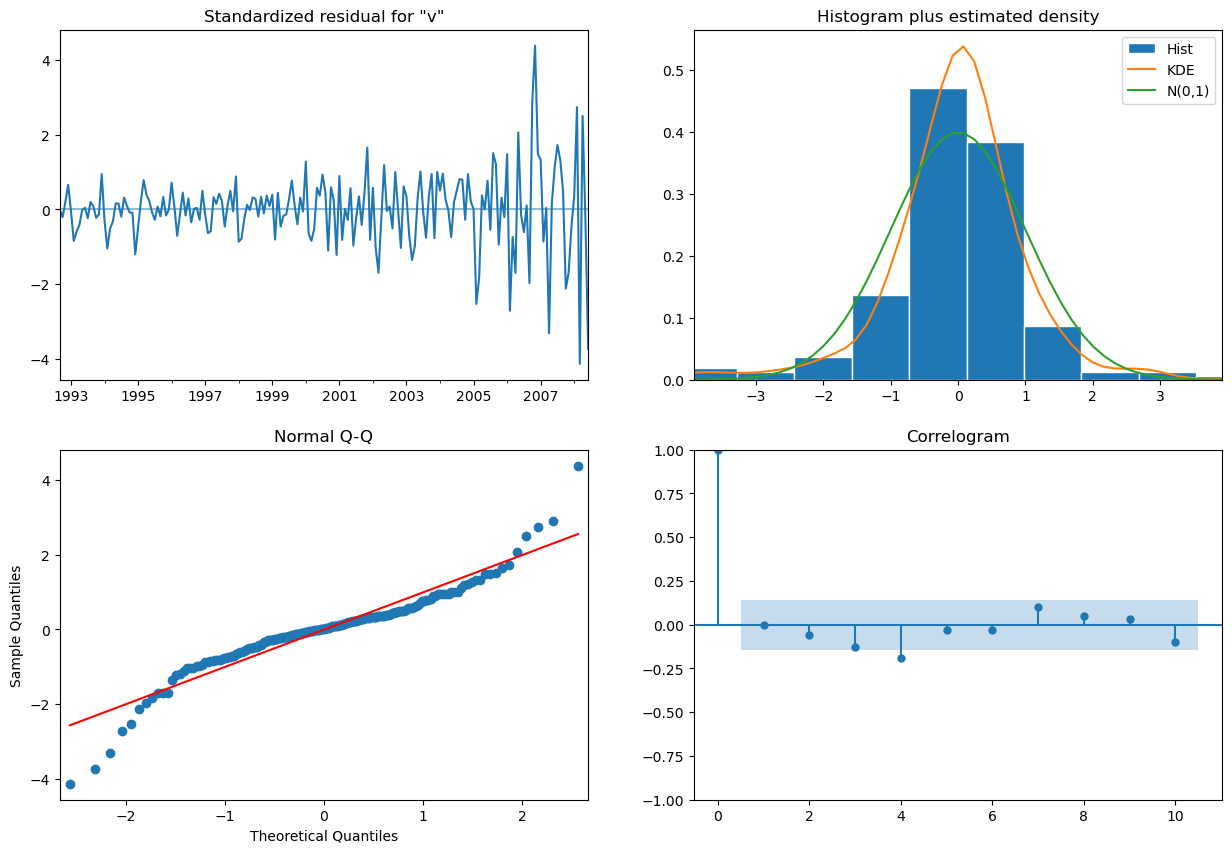

In [13]:
# ACF and PACF plots to identify p, d, q, P, D, Q, s
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(data_diff_2, lags=50, ax=axes[0])
plot_pacf(data_diff_2, lags=50, ax=axes[1])
plt.show()

# 尝试不同的(p, d, q)组合
p_values = [1, 2]
q_values = [1, 12]
d = 2
best_aic = float("inf")
best_order = None
best_mdl = None

for p in p_values:
    for q in q_values:
        try:
            tmp_mdl = SARIMAX(data, order=(p, d, q), seasonal_order=(1, 1, 1, 12)).fit(disp=False)
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (p, d, q)
                best_mdl = tmp_mdl
        except:
            continue

print(f'Best SARIMA{best_order} AIC: {best_aic}')

# 重新拟合最佳模型以进行诊断和摘要并打印
best_model_fit = SARIMAX(data, order=best_order, seasonal_order=(1, 1, 1, 12)).fit(disp=False)
print(best_model_fit.summary())

# 最佳模型诊断图
best_model_fit.plot_diagnostics(figsize=(15, 10))
plt.savefig('best_model_fit')
plt.show()

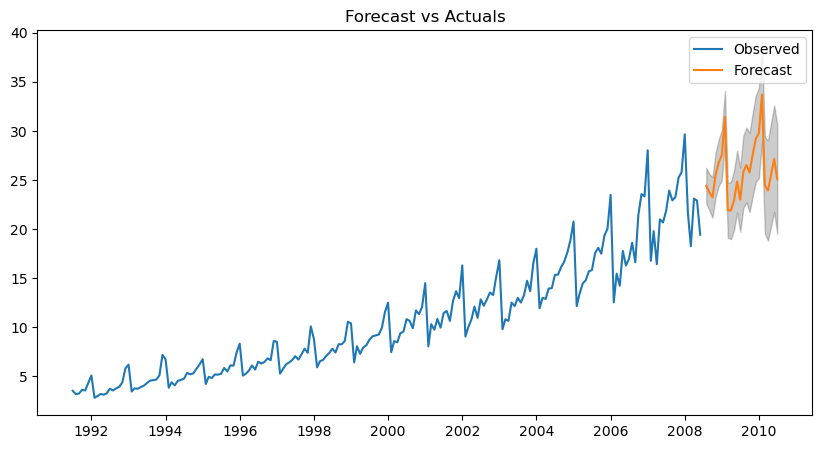

In [20]:
# Forecasting
forecast_steps = 24
forecast = best_model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plotting the forecast
plt.figure(figsize=(10, 5))
plt.plot(data, label='Observed')
plt.plot(forecast_index, forecast_mean, label='Forecast')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='k', alpha=0.2)
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

## 3 模拟和分析ARCH和GARCH模型

参考文献：https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/
 
要求：
(1) 先利用线性模型评估：ARIMA模型
(2)再开展ARCH和GARCH模型评估

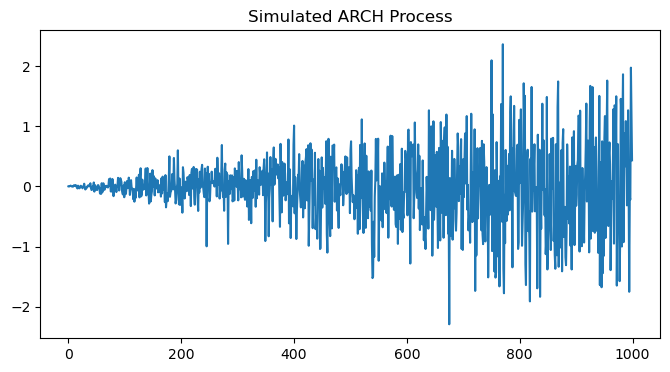

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import gauss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
from statsmodels.tsa.stattools import adfuller

# 生成ARCH模拟数据
N_arch = 1000
data_arch = np.array([gauss(0, i * 0.001) for i in range(1, N_arch + 1)])

# 绘制数据
fig = plt.figure(figsize=(8, 4))
plt.plot(data_arch)
plt.title('Simulated ARCH Process')
plt.show()

用ARIMA模型对生成的数据进行评估

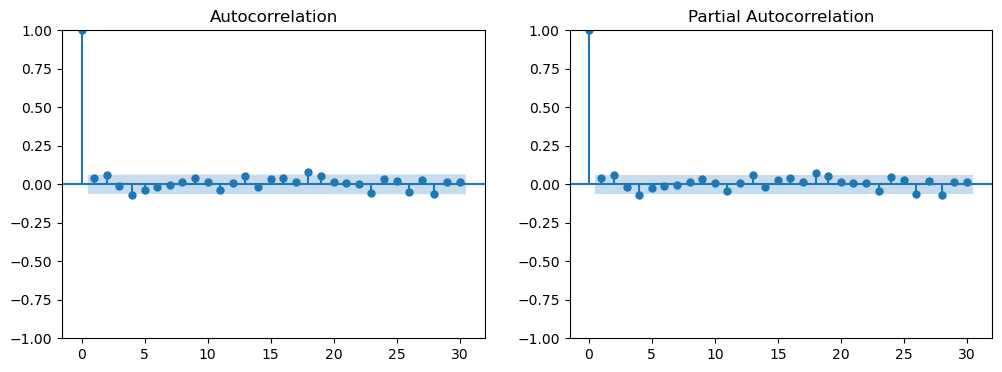

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -914.047
Date:                Sun, 16 Jun 2024   AIC                           1836.094
Time:                        01:11:45   BIC                           1855.725
Sample:                             0   HQIC                          1843.556
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0018      0.021     -0.086      0.931      -0.044       0.040
ar.L1          0.3799      0.371      1.024      0.306      -0.347       1.107
ma.L1         -0.3328      0.378     -0.880      0.3

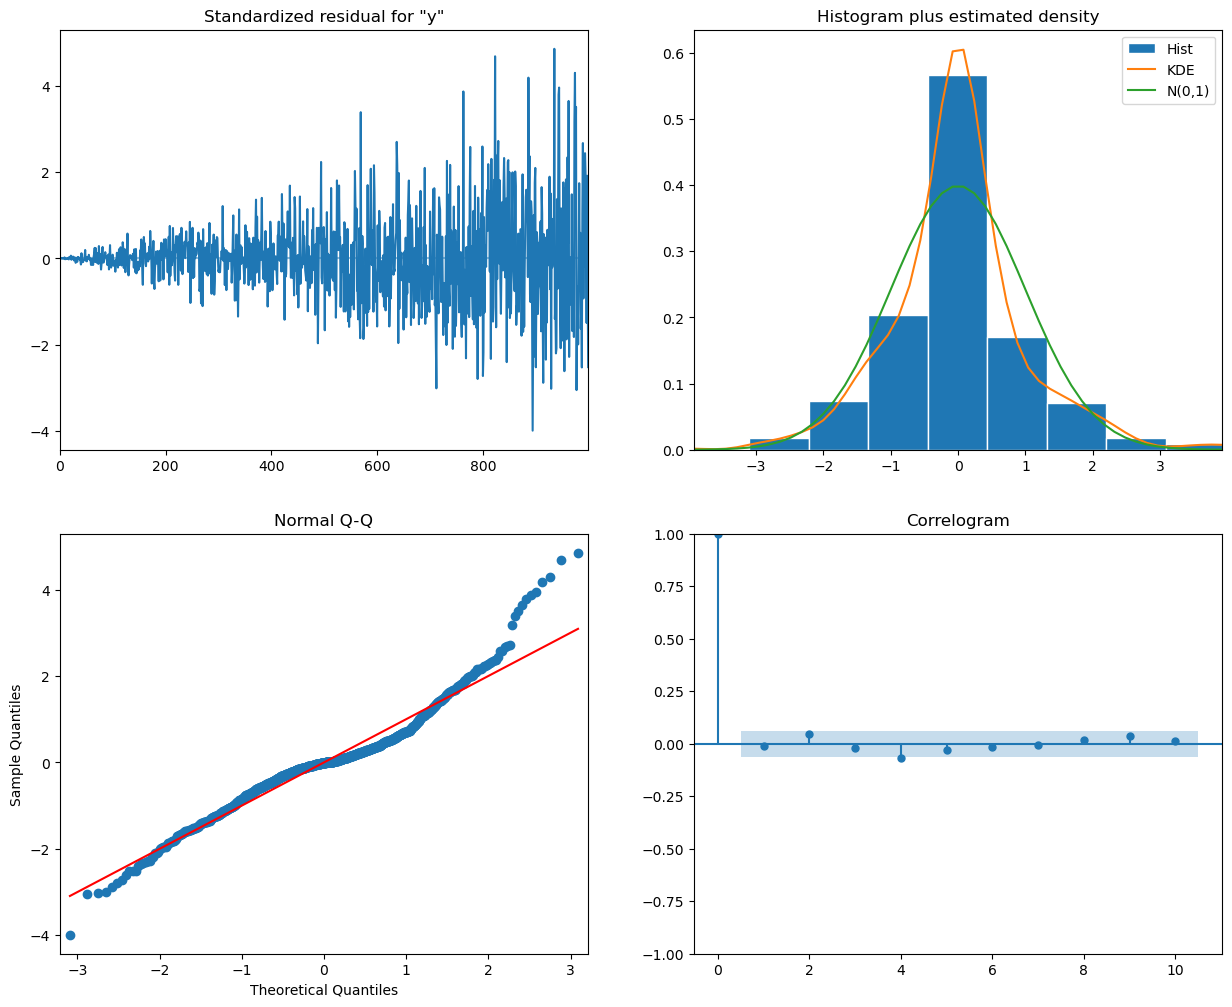

In [36]:
# ACF和PACF图
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(data_arch, ax=axes[0])
plot_pacf(data_arch, ax=axes[1])
plt.show()

# ARIMA模型拟合
model_arima = ARIMA(data_arch, order=(1, 0, 1))
model_arima_fit = model_arima.fit()

# 打印模型摘要
print(model_arima_fit.summary())

# 诊断图
model_arima_fit.plot_diagnostics(figsize=(15, 12))
plt.show()


数据看起来没有显著的自相关性，ACF和PACF图在滞后0之后基本上都在置信区间内。这意味着，可能没有显著的AR或MA结构。且从模型摘要来看，拟合效果不好。<br />使用ARCH和GARCH模型进行进一步评估

Iteration:      1,   Func. Count:      5,   Neg. LLF: 5715.373770052742
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1708.586110305517
Iteration:      3,   Func. Count:     20,   Neg. LLF: 858.8160010554377
Iteration:      4,   Func. Count:     25,   Neg. LLF: 838.2727295625348
Iteration:      5,   Func. Count:     29,   Neg. LLF: 838.2720441449628
Iteration:      6,   Func. Count:     33,   Neg. LLF: 838.272042000425
Iteration:      7,   Func. Count:     36,   Neg. LLF: 838.2720420004289
Optimization terminated successfully    (Exit mode 0)
            Current function value: 838.272042000425
            Iterations: 7
            Function evaluations: 36
            Gradient evaluations: 7
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood

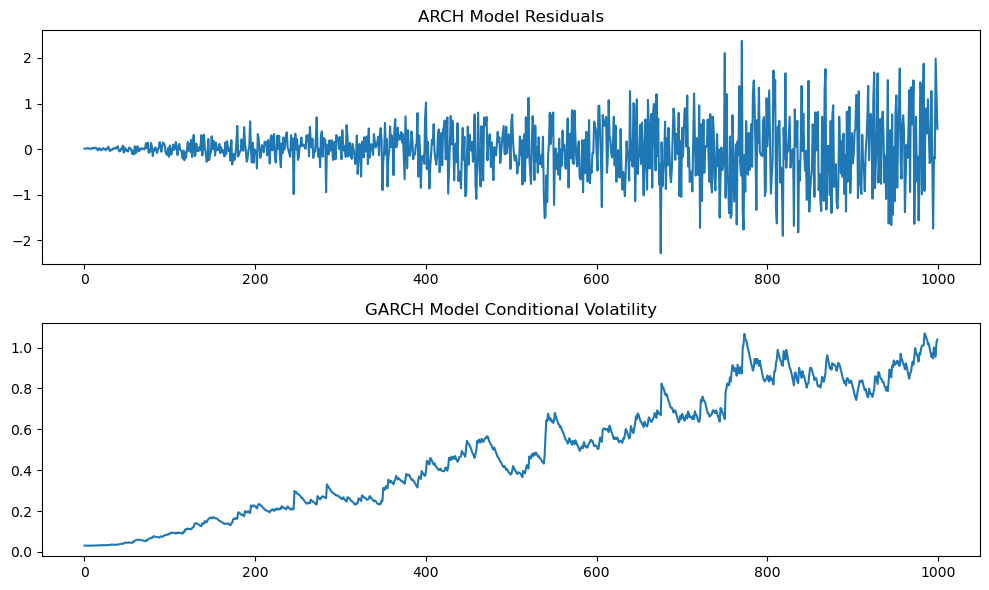

In [16]:
# ARCH模型拟合
model_arch = arch_model(data_arch, vol='ARCH', p=1)
model_arch_fit = model_arch.fit()
print(model_arch_fit.summary())

# GARCH模型拟合
model_garch = arch_model(data_arch, vol='GARCH', p=1, q=1)
model_garch_fit = model_garch.fit()
print(model_garch_fit.summary())

# 绘制模型残差和波动率
fig = plt.figure(figsize=(10, 6))

# ARCH模型残差
plt.subplot(2, 1, 1)
plt.plot(model_arch_fit.resid)
plt.title('ARCH Model Residuals')

# GARCH模型波动率
plt.subplot(2, 1, 2)
plt.plot(model_garch_fit.conditional_volatility)
plt.title('GARCH Model Conditional Volatility')
plt.savefig('arch & garch')
plt.tight_layout()
plt.show()

ARCH模型残差分析：<br />
可以看到，残差的波动性随时间显著增加。这表示数据中存在异方差性（即波动性随着时间变化）。
初始阶段的波动较小，而后期的波动较大，这符合ARCH模型的特征，即条件方差依赖于前期残差的平方。<br />

GARCH模型条件波动率分析：<br />
条件波动率显示了波动性的聚集效应，即高波动性时期往往紧跟高波动性时期，低波动性时期紧跟低波动性时期。
GARCH模型能够捕捉到数据中的这种聚集效应，从而比简单的ARCH模型更好地描述波动性。<br />

结论：<br />
数据表现出显著的异方差性，适合使用ARCH或GARCH模型。<br />
GARCH模型比ARCH模型更能捕捉到波动性的聚集效应，因此在这种情况下GARCH模型可能更优。
